In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Arial'
fig = plt.figure(figsize=(11, 9))

# Define items (with line breaks for some labels)
items = [
    'MMMU', 'GMAI-MMbench \n (val)', 'GMAI-MMbench \n (test)',
    'MMMU-Pro', 'MedXpertQA-MM', 'OpenMM-Medical', 'OmniMedVQA'
]

# Number of items
N = len(items)


# colors = ["#26547c", "#ef476f", "#ffd166", "#06d6a0"]
# colors = ["#ffbe0b", "#fb5607", "#ff006e", "#8338ec"]
colors = ["#fe218b", "#fed700", "#21b0fe", "#26547c"]
# reverse colors
# colors = colors[::-1]

# 原始得分
method1_scores = [0.5533, 0.4002, 0.4055, 0.2847, 0.2030, 0.6233, 0.5841]
method2_scores = [0.5600, 0.3965, 0.3612, 0.3299, 0.2355, 0.6929, 0.6634]
method3_scores = [0.5733, 0.4314, 0.4384, 0.3403, 0.2380, 0.6044, 0.6119]
# method4_scores = [0.6067, 0.4321, 0.4439, 0.3542, 0.2530, 0.7496, 0.7609]

max_scores = []
for i in range(N):
    max_scores.append(max(method1_scores[i], method2_scores[i], method3_scores[i]))

min_scores = []
for i in range(N):
    min_scores.append(min(method1_scores[i], method2_scores[i], method3_scores[i]))

# 为每个项目设定 min 和 max 值
mins = [0.50, 0.38, 0.34, 0.26, 0.20, 0.58, 0.56]
# mins = [item * 0.9 for item in min_scores]
maxs = [item * 1 for item in max_scores] 



# 归一化函数
def normalize(scores, mins, maxs):
    return [(score - mins[i])/(maxs[i]-mins[i]) for i, score in enumerate(scores)]

# 归一化后的数据
method1_norm = normalize(method1_scores, mins, maxs)
method2_norm = normalize(method2_scores, mins, maxs)
method3_norm = normalize(method3_scores, mins, maxs)
# method4_norm = normalize(method4_scores, mins, maxs)

# Set up figure
ax = fig.add_subplot(111, polar=True)

# Compute angle for each axis
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()

# Set the first axis at the top (90 degrees)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)  # Clockwise

# 绘制背景同心圆（仍使用统一 [0,1] 刻度）
circle_positions = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for pos in circle_positions:
    circle = plt.Circle((0, 0), pos, transform=ax.transData._b,
                        fill=False, color='gray', alpha=0.4, linestyle='-', linewidth=1)
    ax.add_artist(circle)
    # ax.text(0, pos, f'.{int(pos*100)}', ha='center', va='bottom', 
    #         color='gray', fontsize=10, alpha=0.7)

# 绘制每个轴的直线
for i in range(N):
    angle = angles[i]
    ax.plot([angle, angle], [0, 1.2], 'k-', lw=0.8, alpha=0.3)

ax.spines['polar'].set_visible(False)

# 闭合雷达图数据
method1_norm = np.append(method1_norm, method1_norm[0])
method2_norm = np.append(method2_norm, method2_norm[0])
method3_norm = np.append(method3_norm, method3_norm[0])
# method4_norm = np.append(method4_norm, method4_norm[0])
angles.append(angles[0])

# 绘制数据曲线和填充区域
ax.plot(angles, method1_norm, colors[0], linewidth=3, label='Qwen2.5-VL-7B')
ax.plot(angles, method2_norm, colors[1], linewidth=3, label='Qwen2.5-VL-7B + SFT')
ax.plot(angles, method3_norm, colors[2], linewidth=3, label='Qwen2.5-VL-7B + RLT')
# ax.plot(angles, method4_norm, colors[3], linewidth=3, label='Qwen2.5-vl-7B + SFT+ RL')
ax.fill(angles, method1_norm, colors[0], alpha=0.1)
ax.fill(angles, method2_norm, colors[1], alpha=0.1)
ax.fill(angles, method3_norm, colors[2], alpha=0.1)
# ax.fill(angles, method4_norm, colors[3], alpha=0.1)
# 移除默认的刻度标签和网格
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)

# 在每个数据点添加归一化后的分数标注（你也可以同时标注原始得分）
for i in range(N):
    angle = angles[i]
    ax.text(angle, method1_norm[i], f'.{int(method1_scores[i]*100)}', 
            color='black', fontsize=18, ha='center', va='center')
    ax.text(angle, method2_norm[i], f'.{int(method2_scores[i]*100)}', 
            color='black', fontsize=18, ha='center', va='center')
    ax.text(angle, method3_norm[i], f'.{int(method3_scores[i]*100)}', 
            color='black', fontsize=18, ha='center', va='center')
    # ax.text(angle, method4_norm[i], f'.{int(method4_scores[i]*100)}', 
    #         color='black', fontsize=18, ha='center', va='center')

# 添加项目标签（注意：标签的位置可根据每个项目的需要手动微调）
radius = 1.0
eps = [0.2, 0.4, 0.55, 0.3, 0.3, 0.55, 0.4]
for i, item in enumerate(items):
    angle = angles[i]
    if i== 2:
        angle -= np.deg2rad(5)  # 可根据需要调整偏移量
    if i == 5:
        angle += np.deg2rad(5)  # 可根据需要调整偏移量
    bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)
    ax.text(angle, radius + eps[i], item, ha='center', va='center', 
            fontsize=23, bbox=bbox_props, rotation=0)

legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
                   fontsize=25, frameon=False, ncol=3,
                   columnspacing=1.0,  # 控制列之间的间隔，值越小间隔越小
                   handletextpad=0.5)  # 控制图例标记和文本之间的间隔，值越小间隔越小

# frame = legend.get_frame()
# frame.set_facecolor('white')
# frame.set_alpha(0.9)
# frame.set_linewidth(1)
# frame.set_edgecolor('#cccccc')

# 绘制外圈以框住图形
outer_circle = plt.Circle((0, 0), 1.0, transform=ax.transData._b,
                            fill=True, facecolor='gray', color='gray', alpha=0.05, linestyle='-', linewidth=1)
ax.add_artist(outer_circle)

plt.savefig('figure1.png', dpi=300, bbox_inches='tight')
plt.show()


/var/folders/57/zwf2q7h16g36lm0q9mzqqqt80000gn/T/ipykernel_84421/1039595616.py:138: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  outer_circle = plt.Circle((0, 0), 1.0, transform=ax.transData._b,


/var/folders/57/zwf2q7h16g36lm0q9mzqqqt80000gn/T/ipykernel_86267/184429236.py:138: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  outer_circle = plt.Circle((0, 0), 1.0, transform=ax.transData._b,


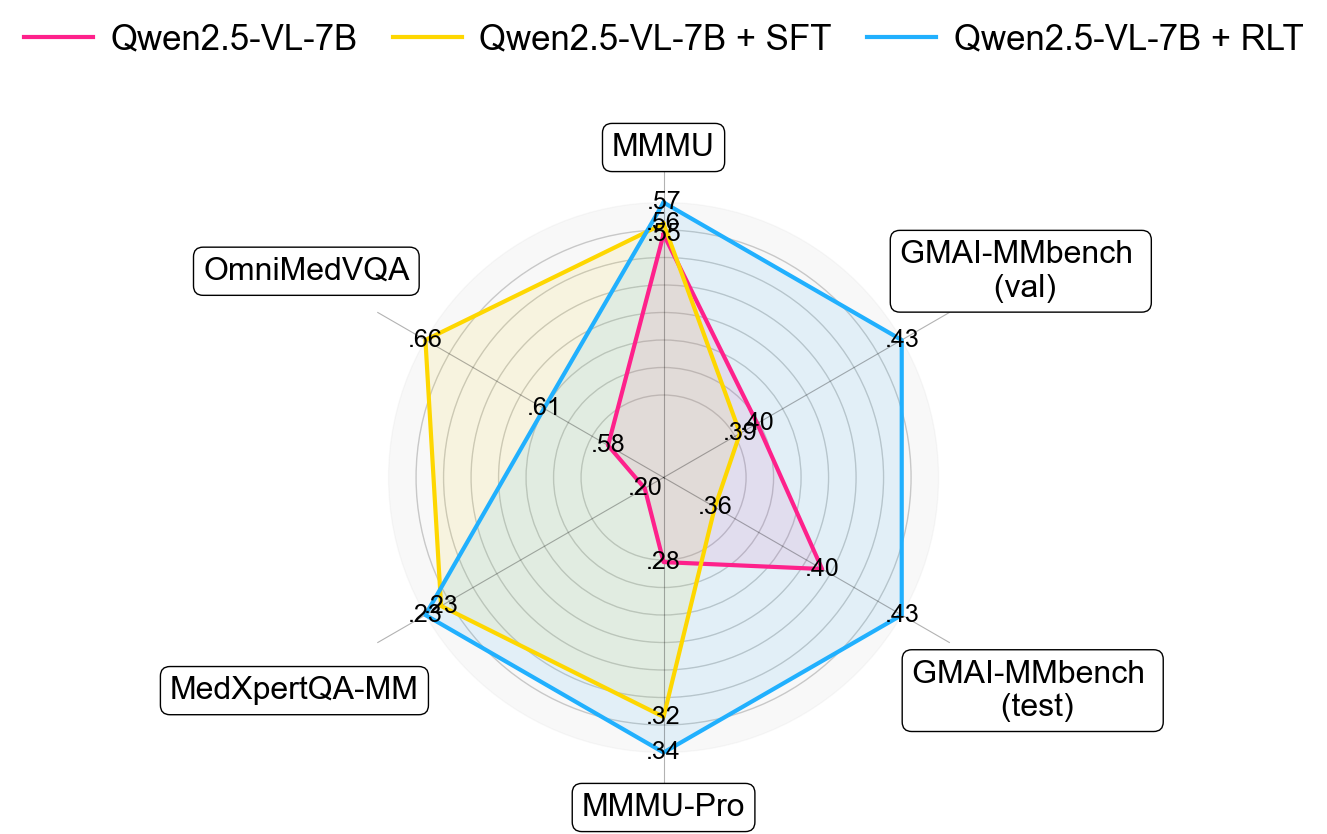

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Arial'
fig = plt.figure(figsize=(11, 9))

# Define items (with line breaks for some labels)
items = [
    'MMMU', 'GMAI-MMbench \n (val)', 'GMAI-MMbench \n (test)',
    'MMMU-Pro', 'MedXpertQA-MM', 'OmniMedVQA'
]

# Number of items
N = len(items)


# colors = ["#26547c", "#ef476f", "#ffd166", "#06d6a0"]
# colors = ["#ffbe0b", "#fb5607", "#ff006e", "#8338ec"]
colors = ["#fe218b", "#fed700", "#21b0fe", "#26547c"]
# reverse colors
# colors = colors[::-1]

# 原始得分
method1_scores = [0.5533, 0.4002, 0.4055, 0.2847, 0.2030, 0.5841]
method2_scores = [0.5600, 0.3965, 0.3612, 0.3299, 0.2355, 0.6634]
method3_scores = [0.5733, 0.4314, 0.4384, 0.3403, 0.2380, 0.6119]
# method4_scores = [0.6067, 0.4321, 0.4439, 0.3542, 0.2530, 0.7496, 0.7609]

max_scores = []
for i in range(N):
    max_scores.append(max(method1_scores[i], method2_scores[i], method3_scores[i]))

min_scores = []
for i in range(N):
    min_scores.append(min(method1_scores[i], method2_scores[i], method3_scores[i]))

# 为每个项目设定 min 和 max 值
mins = [0.40, 0.38, 0.34, 0.26, 0.20, 0.56]
# mins = [item * 0.9 for item in min_scores]
maxs = [item * 1 for item in max_scores] 



# 归一化函数
def normalize(scores, mins, maxs):
    return [(score - mins[i])/(maxs[i]-mins[i]) for i, score in enumerate(scores)]

# 归一化后的数据
method1_norm = normalize(method1_scores, mins, maxs)
method2_norm = normalize(method2_scores, mins, maxs)
method3_norm = normalize(method3_scores, mins, maxs)
# method4_norm = normalize(method4_scores, mins, maxs)

# Set up figure
ax = fig.add_subplot(111, polar=True)

# Compute angle for each axis
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()

# Set the first axis at the top (90 degrees)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)  # Clockwise

# 绘制背景同心圆（仍使用统一 [0,1] 刻度）
circle_positions = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for pos in circle_positions:
    circle = plt.Circle((0, 0), pos, transform=ax.transData._b,
                        fill=False, color='gray', alpha=0.4, linestyle='-', linewidth=1)
    ax.add_artist(circle)
    # ax.text(0, pos, f'.{int(pos*100)}', ha='center', va='bottom', 
    #         color='gray', fontsize=10, alpha=0.7)

# 绘制每个轴的直线
for i in range(N):
    angle = angles[i]
    ax.plot([angle, angle], [0, 1.2], 'k-', lw=0.8, alpha=0.3)

ax.spines['polar'].set_visible(False)

# 闭合雷达图数据
method1_norm = np.append(method1_norm, method1_norm[0])
method2_norm = np.append(method2_norm, method2_norm[0])
method3_norm = np.append(method3_norm, method3_norm[0])
# method4_norm = np.append(method4_norm, method4_norm[0])
angles.append(angles[0])

# 绘制数据曲线和填充区域
ax.plot(angles, method1_norm, colors[0], linewidth=3, label='Qwen2.5-VL-7B')
ax.plot(angles, method2_norm, colors[1], linewidth=3, label='Qwen2.5-VL-7B + SFT')
ax.plot(angles, method3_norm, colors[2], linewidth=3, label='Qwen2.5-VL-7B + RLT')
# ax.plot(angles, method4_norm, colors[3], linewidth=3, label='Qwen2.5-vl-7B + SFT+ RL')
ax.fill(angles, method1_norm, colors[0], alpha=0.1)
ax.fill(angles, method2_norm, colors[1], alpha=0.1)
ax.fill(angles, method3_norm, colors[2], alpha=0.1)
# ax.fill(angles, method4_norm, colors[3], alpha=0.1)   
# 移除默认的刻度标签和网格
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)

# 在每个数据点添加归一化后的分数标注（你也可以同时标注原始得分）
for i in range(N):
    angle = angles[i]
    ax.text(angle, method1_norm[i], f'.{int(method1_scores[i]*100)}', 
            color='black', fontsize=18, ha='center', va='center')
    ax.text(angle, method2_norm[i], f'.{int(method2_scores[i]*100)}', 
            color='black', fontsize=18, ha='center', va='center')
    ax.text(angle, method3_norm[i], f'.{int(method3_scores[i]*100)}', 
            color='black', fontsize=18, ha='center', va='center')
    # ax.text(angle, method4_norm[i], f'.{int(method4_scores[i]*100)}', 
    #         color='black', fontsize=18, ha='center', va='center')

# 添加项目标签（注意：标签的位置可根据每个项目的需要手动微调）
radius = 1.0
eps = [0.2, 0.5, 0.55, 0.2, 0.55, 0.5]
for i, item in enumerate(items):
    angle = angles[i]
    # if i== 2:
    #     angle -= np.deg2rad(5)  # 可根据需要调整偏移量
    # if i == 5:
    #     angle += np.deg2rad(5)  # 可根据需要调整偏移量
    bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)
    ax.text(angle, radius + eps[i], item, ha='center', va='center', 
            fontsize=23, bbox=bbox_props, rotation=0)

legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
                   fontsize=25, frameon=False, ncol=3,
                   columnspacing=1.0,  # 控制列之间的间隔，值越小间隔越小
                   handletextpad=0.5)  # 控制图例标记和文本之间的间隔，值越小间隔越小

# frame = legend.get_frame()
# frame.set_facecolor('white')
# frame.set_alpha(0.9)
# frame.set_linewidth(1)
# frame.set_edgecolor('#cccccc')

# 绘制外圈以框住图形
outer_circle = plt.Circle((0, 0), 1.0, transform=ax.transData._b,
                            fill=True, facecolor='gray', color='gray', alpha=0.05, linestyle='-', linewidth=1)
ax.add_artist(outer_circle)

plt.savefig('figure1.png', dpi=300, bbox_inches='tight')
plt.show()
